# Introduction
What is the best neighborhood in Pittsburgh? Well, one important thing that we can consider is how safe a neighborhood is to own a car in. With the help of data from the Western Pennsylvania Regional Data Center (WPRDC), we can measure car safety per neighborhood. What makes a neighborhood favorable to own a car in? Let's look at the metrics we picked...

# The Metric 📈
Our overall metric is "best neighborhood to own a car in". In order to find the best neighborhood according to this metric, we chose submetrics from WPRDC datasets:
1. Amount Speed Bumps per Neighborhood - Allison
2. Amount Signalized Intersections per Neighborhood - Anne
3. Traffic Count per neighborhood - Erin

Our submetrics are mostly concerned with how regulated each neighborhoods roads are, which will help us determine the best of them!

# 1) Speed Bumps - Allison

My data set contained information on all of the recorded speed bumps in Pittsburgh. The data collected included the street, neighborhood and longitude/latidude of each speed bump. It also included the material each bump was made up, the nearest fire station and the nearest police station. To help decide which neighborhood in Pittsburgh is the safest to drive in I used the amount of speed bumps per neighbor hood. We decided that for a neighborhood to be safe to drive in, it would have a higher amount of speed bumps. Speed bumps are used in vital in areas that can get high pedestrian traffic. When strategically placed, they can hinder speeding vehicles before crossings, entrances and exits, sharp turns, etc. Overall they help prevent prevent accidents by a large amount. Using this metric I was able to come to the personal conclusion of the safest neighborhood to drive in.

First, I imported pandas, matplot, and geopandas. I then read in my Speed Bumps data file that is stored in this folder as a csv. After that, I created a dataframe that has the number of speedbumps containtained in each neighborhod.

In [56]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import geopandas
%matplotlib inline

data = pd.read_csv("SpeedBumps.csv")
data_neighborhood = data.groupby("neighborhood")['id'].count()

data_neighborhood

neighborhood
Bloomfield              3
Brookline               4
Carrick                 9
Central Oakland         1
Garfield                3
Highland Park           2
Homewood South          4
Mount Washington        3
North Oakland           6
Overbrook               1
Perry North             4
Polish Hill             6
South Side Flats        3
South Side Slopes       4
Squirrel Hill North     3
Squirrel Hill South    18
Stanton Heights         1
Upper Hill              4
Name: id, dtype: int64

I was interested to see the different specific streets and how much speed bumps they contain individually. I created another data frame that shows the streetname as well as the amount of speed bumps in it. Then I sorted them from least to greatest to signify which streets have the most and the least. Under the list I added a barchart to help display the data and compare streets.

In [61]:
# find out how many different types of courts there are
different_streets = data.groupby("locator_street")['id'].count()
different_streets = different_streets.sort_values()
different_streets

KeyError: 'locator_street'

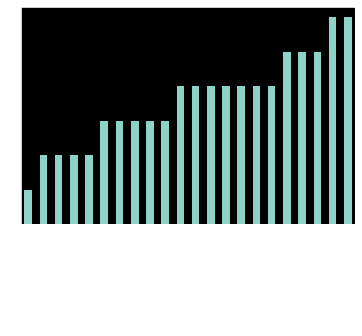

In [25]:
different_streets.plot.bar()

To represent which neighborhoods have the most speedbumps, I decided to make a map displaying the data. To create the map I read in the neighborhoods shapefile that was given to us in the previous lab. I then merged the shape file and the data_neighborhood data frame. The dark blue regions signify neighborhoods with the most speed bumps and as it gets lighter there are less speedbumps. The grey areas either have no speed bumps or none that were recorded.

In [26]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 

In [27]:
speedbumps_map = neighborhoods.merge(data_neighborhood, how='left', left_on='hood', right_index=True)

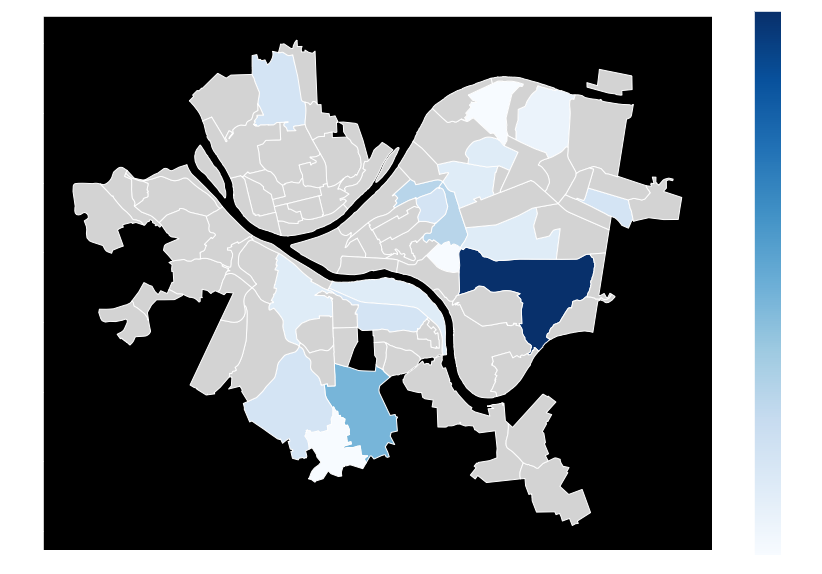

In [28]:
speedbumps_map.plot(column='id', 
               cmap='Blues',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Number Speed Bumps"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

Below I created another list of the neighborhoods, this time in descending order so it is easier to identify which nieghborhoods have the most and the least speed bumps.

In [29]:
sort_neighboorhoods = data_neighborhood.sort_values(ascending= False)
sort_neighboorhoods

neighborhood
Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Perry North             4
Brookline               4
Homewood South          4
Upper Hill              4
South Side Slopes       4
Mount Washington        3
South Side Flats        3
Garfield                3
Squirrel Hill North     3
Bloomfield              3
Highland Park           2
Overbrook               1
Stanton Heights         1
Central Oakland         1
Name: id, dtype: int64

## Conclusion for Speed Bumps
Strictly looking at the data on speed bumps, it can be infered that the nieghborhoods with the most amount of speed bumps are:

Squirrel Hill South
Carrick
North Oakland
Squrrel Hill South has the highest amount of speed bumps, being the only nieghborhood with over 10 speed bumps. Therefore using the data collected I concluded that Squirrel Hill South is the safest nieghborhood to drive in.

# 2) Signalized Intersections - Anne
What makes a neighborhood favorable to own a car in? Well, if you want to keep your car in good shape, you'll likely want to steer away from neighborhoods with bad roads and intersections. The data set I chose was "Signalized Intersections", which lists every signalized intersection in Pittsburgh. A signalized intersection is an intersection where traffic is controlled by official traffic-control signals (stop lights and pedestrain crosswalks). So, when a neighborhood has more signalized intersections, it is less likely do get got up in a bad accident.

![autonomous-intersection.gif](https://cdn.dribbble.com/users/648290/screenshots/3802271/autonomous-intersection.gif)

So, we are looking for the neighborhoods with the greatest amount of signalized intersections. Here's a look at the data:

Bedford Dwellings             1
Hays                          1
Mount Oliver Borough          1
St. Clair                     1
Fairywood                     1
                             ..
Bloomfield                   30
Squirrel Hill South          30
East Liberty                 31
Shadyside                    35
Central Business District    87
Name: neighborhood, Length: 82, dtype: int64
9.195121951219512


Text(0, 0.5, 'Identified Signalized Intersections')

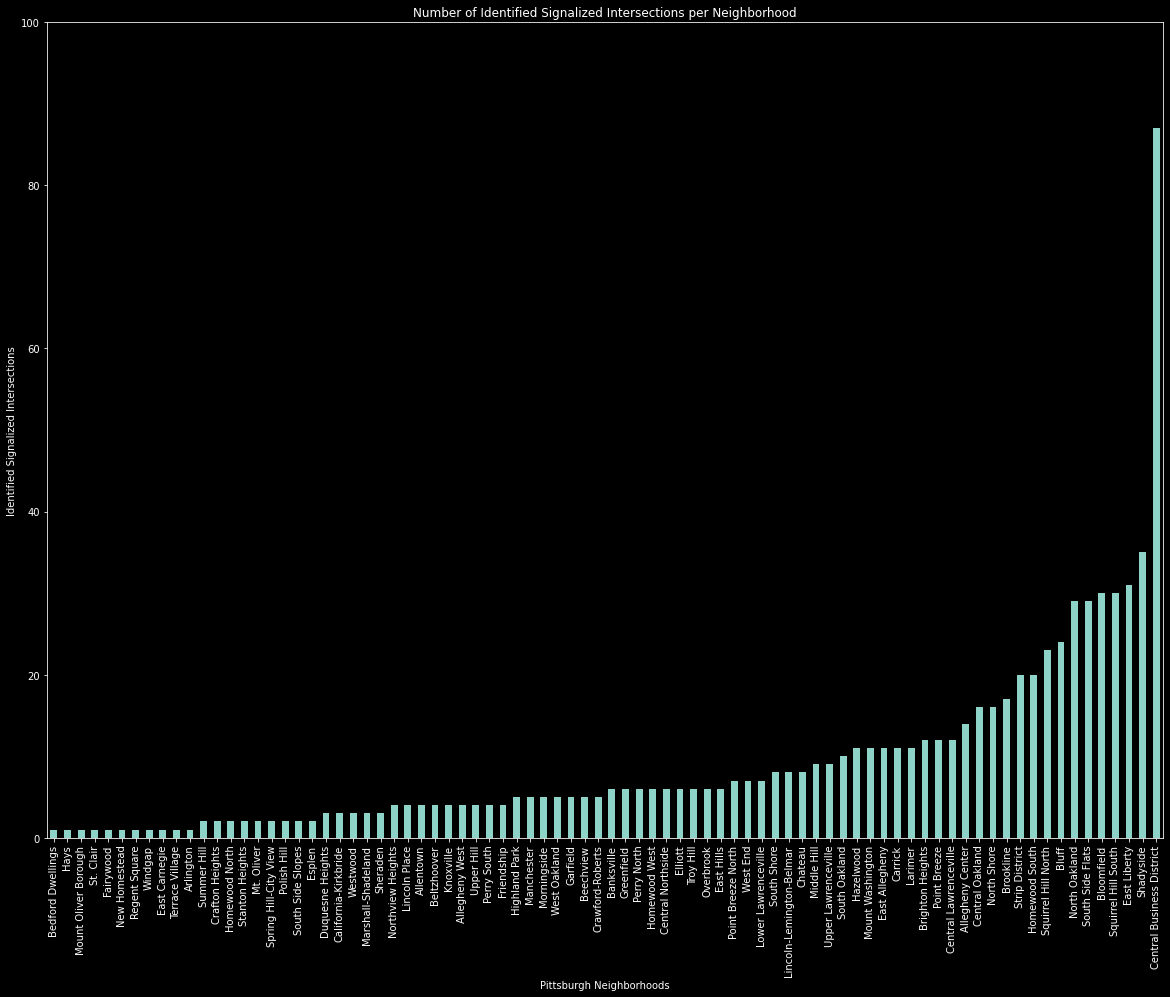

In [59]:
#Import data from data set
data = pd.read_csv("SignalizedIntersections.csv", index_col = "id")
#Gets the amount of signalized intersection entries per neighborhood and sorts from least to greatest
data_plot = data["neighborhood"].value_counts().sort_values(ascending = True)

#See specific amounts for each neighborhood
print(data_plot)

#Bar Graph
plt.style.use('dark_background')
data_plot.plot.bar(figsize=(20,15), ylim=[0,100])
plt.title("Number of Identified Signalized Intersections per Neighborhood")
plt.xlabel("Pittsburgh Neighborhoods")
plt.ylabel("Identified Signalized Intersections")

Hmm... to no surprise, Pittsburgh's "Central Business District" (Downtown) is the neighborhood that has the most signalized intersections in Pittsburgh based off the dataset. Shadyside in second place with 35, and East Liberty in third with 31. (We will assume that any intersections that were not accounted for do not greatly affect our ratios.)

# Winners for Most Signalized Intersections:
## 1. Downtown 🥇
### 2. Shadyside 🥈
#### 3. East Liberty 🥉

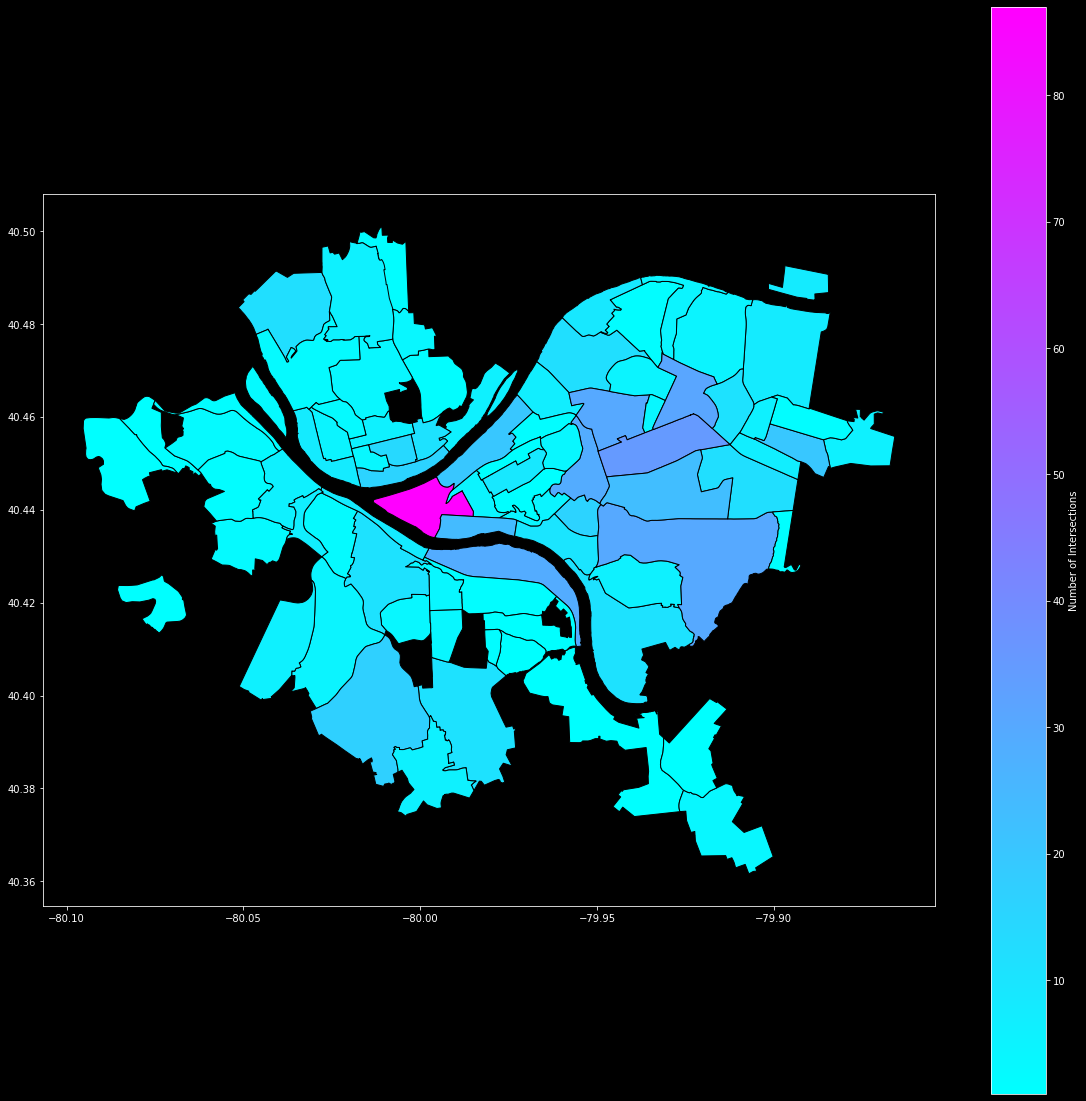

In [47]:
#gets the data set again
data = pd.read_csv("SignalizedIntersections.csv", index_col = "id")
data["number_of_intersections"] = 1

#groups the neighborhoods and entires for each
intersections = data.groupby("neighborhood").sum()["number_of_intersections"]
intersections.sort_values(ascending = False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
intersection_map = neighborhoods.merge(intersections, how = 'left', left_on = 'hood',right_on = 'neighborhood')
intersection_map.plot(column = 'number_of_intersections', cmap = 'cool', edgecolor = "black", legend = True, legend_kwds = {'label': "Number of Intersections"}, figsize=(20,20))

## Conclusion for Signalized Intersections
From the bar graph and intersection map, we can see that Downtown is very much ahead in terms of signalized intersections. This may be a bias in the dataset, but it also makes sense for a high-traffic area to implement more regulated road systems. Based on the overall metric of "safest neighborhood to own a car in", these neighborhoods that have more signalized intersections can reflect on how safe it is to drive there (or where the roads are most regulated). So the winners here are Downtown, Shadyside, and East Liberty! Personally, my favorite neighborhood is Oakland since I'm so familiar with it, but I mostly walk where I need to go so maybe it's good that I don't drive here.

# 3) Traffic - Erin

In this project, we focus on traffic and street safety to determine which neighborhood is the safest in terms of automobile use. This section analyzes a data set to figure out which neighborhood is the "best" neighborhood based on average traffic.

![Pittsburgh](https://media.giphy.com/media/3iBbpAmau6ayZeEWgq/giphy.gif)

In [51]:
# load pandas
import pandas as pd
import numpy as np
%matplotlib inline 
# load data
traffic_count_pandas = pd.read_csv("TrafficCount.csv") 
data_nieghborhood = traffic_count_pandas.groupby("neighborhood")['id'].count()

#load plot
import matplotlib.pyplot as plt

#geopandas
import geopandas

The section below will calculate the average daily car traffic for each specific neighborhood.

In [52]:
print("Average daily car traffic of each neighborhood")
print("---------------------------------------------")

#--------------------------------------------------------------------------------------

#oakland (cental, north, south, west)
centralOMask = traffic_count_pandas['neighborhood'] == "Central Oakland"
centralO = traffic_count_pandas[centralOMask]

northOMask = traffic_count_pandas['neighborhood'] == "North Oakland"
northO = traffic_count_pandas[northOMask]

southOMask = traffic_count_pandas['neighborhood'] == "South Oakland"
southO = traffic_count_pandas[southOMask]

westOMask = traffic_count_pandas['neighborhood'] == "West Oakland"
westO = traffic_count_pandas[westOMask]

oakland_data = pd.concat([centralO, northO, southO, westO])
oaklandMean = oakland_data["average_daily_car_traffic"].mean()

print("Oakland: " + str(oaklandMean))

#--------------------------------------------------------------------------------------

#south side (slopes and flats)
southSideSlopesMask = traffic_count_pandas['neighborhood'] == "South Side Slopes"
southSideSlopes = traffic_count_pandas[southSideSlopesMask]

southSideFlatsMask = traffic_count_pandas['neighborhood'] == "South Side Flats"
southSideFlats = traffic_count_pandas[southSideFlatsMask]

south_side_data = pd.concat([southSideSlopes, southSideFlats])
southsideMean = south_side_data["average_daily_car_traffic"].mean()

print("South Side: " + str(southsideMean))

#--------------------------------------------------------------------------------------

#squirrel hill (north and south)
northSquirrelMask = traffic_count_pandas['neighborhood'] == "Squirrel Hill North"
northSquirrel = traffic_count_pandas[northSquirrelMask]

southSquirrelMask = traffic_count_pandas['neighborhood'] == "Squirrel Hill South"
southSquirrel = traffic_count_pandas[southSquirrelMask]

squirrel_hill_data = pd.concat([southSquirrel, northSquirrel])
squirrelhillMean = squirrel_hill_data["average_daily_car_traffic"].mean()

print("Squirrel Hill: "+ str(squirrelhillMean))

#--------------------------------------------------------------------------------------

#greenfield
greenfieldMask = traffic_count_pandas['neighborhood'] == "Greenfield"
greenfield = traffic_count_pandas[greenfieldMask]
greenfieldMean = greenfield["average_daily_car_traffic"].mean()

print("Greenfield: " + str(greenfieldMean))

#--------------------------------------------------------------------------------------

#polish hill
polishHillMask = traffic_count_pandas['neighborhood'] == "Polish Hill"
polishHill = traffic_count_pandas[polishHillMask]
polishHillMean = polishHill["average_daily_car_traffic"].mean()

print("Polish Hill: " + str(polishHillMean))

#--------------------------------------------------------------------------------------

#east hills
eastHillsMask = traffic_count_pandas['neighborhood'] == "East Hills"
eastHills = traffic_count_pandas[eastHillsMask]
eastHillsMean = eastHills["average_daily_car_traffic"].mean()

print("East Hills: " + str(eastHillsMean))

#--------------------------------------------------------------------------------------

#east liberty
eastLibertyMask = traffic_count_pandas['neighborhood'] == "East Liberty"
eastLiberty = traffic_count_pandas[eastLibertyMask]
eastLibertyMean = eastLiberty["average_daily_car_traffic"].mean()

print("East Liberty: " + str(eastLibertyMean))

#--------------------------------------------------------------------------------------

#point breeze 
pointBreezeMask = traffic_count_pandas['neighborhood'] == "Point Breeze"
pointBreeze = traffic_count_pandas[pointBreezeMask]

pointBreezeNorthMask = traffic_count_pandas['neighborhood'] == "Point Breeze North"
pointBreezeNorth = traffic_count_pandas[pointBreezeNorthMask]

point_breeze_data = pd.concat([pointBreeze, pointBreezeNorth])
pointBreezeMean = point_breeze_data["average_daily_car_traffic"].mean()

print("Point Breeze: " + str(pointBreezeMean))

#--------------------------------------------------------------------------------------

#bluff
bluffMask = traffic_count_pandas['neighborhood'] == "Bluff"
bluff = traffic_count_pandas[bluffMask]
bluffMean = bluff["average_daily_car_traffic"].mean()

print("Bluff: " + str(bluffMean))

#--------------------------------------------------------------------------------------

#brookline
brooklineMask = traffic_count_pandas['neighborhood'] == "Brookline"
brookline = traffic_count_pandas[brooklineMask]
brooklineMean = brookline["average_daily_car_traffic"].mean()

print("Brookline: " + str(brooklineMean))

#--------------------------------------------------------------------------------------

#larimer
larimerMask = traffic_count_pandas['neighborhood'] == "Larimer"
larimer = traffic_count_pandas[larimerMask]
larimerMean = larimer["average_daily_car_traffic"].mean()

print("Larimer: " + str(larimerMean))

#--------------------------------------------------------------------------------------

#knoxville
knoxvilleMask = traffic_count_pandas['neighborhood'] == "Knoxville"
knoxville = traffic_count_pandas[knoxvilleMask]
knoxvilleMean = knoxville["average_daily_car_traffic"].mean()

print("Knoxville: " + str(knoxvilleMean))

#--------------------------------------------------------------------------------------

#highland park
highlandParkMask =  traffic_count_pandas['neighborhood'] == "Highland Park"
highlandPark = traffic_count_pandas[highlandParkMask]
highlandParkMean = highlandPark["average_daily_car_traffic"].mean()

print("Highland Park: " + str(highlandParkMean))

#--------------------------------------------------------------------------------------

#carrick
carrickMask =  traffic_count_pandas['neighborhood'] == "Carrick"
carrick = traffic_count_pandas[carrickMask]
carrickMean = carrick["average_daily_car_traffic"].mean()

print("Carrick: " + str(carrickMean))

#--------------------------------------------------------------------------------------

#lawrenceville (central, upper, lower)
centralLMask = traffic_count_pandas['neighborhood'] == "Central Lawrenceville"
centralL = traffic_count_pandas[centralLMask]

upperLMask = traffic_count_pandas['neighborhood'] == "Upper Lawrenceville"
upperL = traffic_count_pandas[upperLMask]

lowerLMask = traffic_count_pandas['neighborhood'] == "Lower Lawrenceville"
lowerL = traffic_count_pandas[lowerLMask]

lawrenceville_data = pd.concat([upperL, lowerL, centralL])
lawrencevilleMean = lawrenceville_data["average_daily_car_traffic"].mean()

print("Lawrenceville: " + str(lawrencevilleMean))
      
#--------------------------------------------------------------------------------------

#shadyside
shadysideMask =  traffic_count_pandas['neighborhood'] == "Shadyside"
shadyside = traffic_count_pandas[shadysideMask]
shadysideMean = shadyside["average_daily_car_traffic"].mean()

print("Shadyside: " + str(shadysideMean))
      
#--------------------------------------------------------------------------------------

#hazelwood
hazelwoodMask =  traffic_count_pandas['neighborhood'] == "Hazelwood"
hazelwood = traffic_count_pandas[hazelwoodMask]
hazelwoodMean = hazelwood["average_daily_car_traffic"].mean()

print("Hazelwood: " + str(hazelwoodMean))

#--------------------------------------------------------------------------------------

#windgap
windgapMask =  traffic_count_pandas['neighborhood'] == "Windgap"
windgap = traffic_count_pandas[windgapMask]
windgapMean = windgap["average_daily_car_traffic"].mean()

print("Windgap: " + str(windgapMean))

#--------------------------------------------------------------------------------------

#perry (north and south)
perryNMask = traffic_count_pandas['neighborhood'] == "PerryNorth"
northP = traffic_count_pandas[perryNMask]

perrySMask = traffic_count_pandas['neighborhood'] == "Perry South"
southP = traffic_count_pandas[perrySMask]

perry_data = pd.concat([northP, southP])
perryMean = perry_data["average_daily_car_traffic"].mean()

print("Perry: " + str(perryMean))

#--------------------------------------------------------------------------------------

#mount washington
mountMask =  traffic_count_pandas['neighborhood'] == "Mount Washington"
mount = traffic_count_pandas[mountMask]
mountMean = mount["average_daily_car_traffic"].mean()

print("Mount Washington: " + str(mountMean))

#--------------------------------------------------------------------------------------

#bloomfield
bloomMask =  traffic_count_pandas['neighborhood'] == "Bloomfield"
bloom = traffic_count_pandas[bloomMask]
bloomMean = bloom["average_daily_car_traffic"].mean()

print("Bloomfield: " + str(bloomMean))

#--------------------------------------------------------------------------------------

#friendship
friendshipMask =  traffic_count_pandas['neighborhood'] == "Friendship"
friendship = traffic_count_pandas[friendshipMask]
friendshipMean = friendship["average_daily_car_traffic"].mean()

print("Friendship: " + str(friendshipMean))

#--------------------------------------------------------------------------------------

#westwood
westwoodMask =  traffic_count_pandas['neighborhood'] == "Westwood"
westwood = traffic_count_pandas[westwoodMask]
westwoodMean = westwood["average_daily_car_traffic"].mean()

print("Westwood: " + str(westwoodMean))

#--------------------------------------------------------------------------------------

#strip district
stripMask =  traffic_count_pandas['neighborhood'] == "Strip District"
strip = traffic_count_pandas[stripMask]
stripMean = strip["average_daily_car_traffic"].mean()

print("Strip District: " + str(stripMean))

#--------------------------------------------------------------------------------------

#beechview
beechMask =  traffic_count_pandas['neighborhood'] == "Beechview"
beech = traffic_count_pandas[beechMask]
beechMean = beech["average_daily_car_traffic"].mean()

print("Beechview: " + str(beechMean))

#--------------------------------------------------------------------------------------

#stanton heights
stantMask =  traffic_count_pandas['neighborhood'] == "Stanton Heights"
stanton = traffic_count_pandas[stantMask]
stantMean = stanton["average_daily_car_traffic"].mean()

print("Stanton Heights: " + str(stantMean))

#--------------------------------------------------------------------------------------

#manchester
manMask =  traffic_count_pandas['neighborhood'] == "Manchester"
manchester = traffic_count_pandas[manMask]
manMean = manchester["average_daily_car_traffic"].mean()

print("Manchester: " + str(manMean))

#--------------------------------------------------------------------------------------

#morningside
morningMask =  traffic_count_pandas['neighborhood'] == "Morningside"
morningside = traffic_count_pandas[morningMask]
morningMean = morningside["average_daily_car_traffic"].mean()

print("Morningside: " + str(morningMean))

#--------------------------------------------------------------------------------------

#duquesne heights
duqMask =  traffic_count_pandas['neighborhood'] == "Duquesne Heights"
duq = traffic_count_pandas[duqMask]
duqMean = duq["average_daily_car_traffic"].mean()

print("Duquesne Heights: " + str(duqMean))

#--------------------------------------------------------------------------------------

#sheraden
sheradenMask =  traffic_count_pandas['neighborhood'] == "Sheraden"
sheraden = traffic_count_pandas[sheradenMask]
sheradenMean = sheraden["average_daily_car_traffic"].mean()

print("Sheraden: " + str(sheradenMean))

#--------------------------------------------------------------------------------------

#elliott
elliottMask =  traffic_count_pandas['neighborhood'] == "Elliott"
elliott = traffic_count_pandas[elliottMask]
elliottMean = elliott["average_daily_car_traffic"].mean()

print("Elliott: " + str(elliottMean))

#--------------------------------------------------------------------------------------

#lincoln-lemington-belmar
lincolnMask =  traffic_count_pandas['neighborhood'] == "Lincoln-Lemington-Belmar"
lincolnlemington = traffic_count_pandas[lincolnMask]
lincolnlemingtonMean = lincolnlemington["average_daily_car_traffic"].mean()

print("Lincoln-Lemington-Belmar: " + str(lincolnlemingtonMean))

#--------------------------------------------------------------------------------------

#lincoln place
lincolnPMask =  traffic_count_pandas['neighborhood'] == "Lincoln Place"
lincolnP = traffic_count_pandas[lincolnPMask]
lincolnPMean = lincolnP["average_daily_car_traffic"].mean()

print("Lincoln Place: " + str(elliottMean))

Average daily car traffic of each neighborhood
---------------------------------------------
Oakland: 4714.0
South Side: 3320.25
Squirrel Hill: 3278.6857142857143
Greenfield: 2386.0
Polish Hill: 2649.0
East Hills: 8126.5
East Liberty: 4658.818181818182
Point Breeze: 4117.0
Bluff: 1788.3333333333333
Brookline: 3914.4
Larimer: 3771.3
Knoxville: 3823.0
Highland Park: 1564.7333333333333
Carrick: 1969.5714285714287
Lawrenceville: 2121.375
Shadyside: 4408.8
Hazelwood: 1289.5
Windgap: 1531.0
Perry: 3018.75
Mount Washington: 5259.555555555556
Bloomfield: 3078.6428571428573
Friendship: 2443.5
Westwood: 7700.0
Strip District: 9691.666666666666
Beechview: 1418.3333333333333
Stanton Heights: 4068.0
Manchester: 2129.3
Morningside: 2049.285714285714
Duquesne Heights: 5831.0
Sheraden: 2844.0
Elliott: 1342.6666666666667
Lincoln-Lemington-Belmar: 195.0
Lincoln Place: 1342.6666666666667


As shown in the data, the Strip District had the most traffic, with an average of 9,691 cars. Lincoln-Lemington-Belmar had the least, with an average of 195 cars.

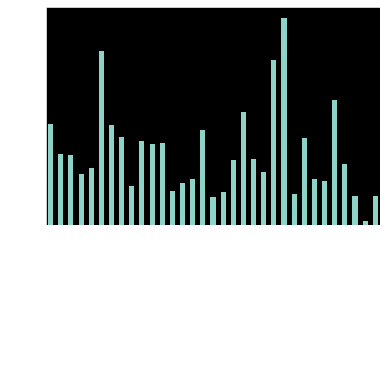

In [54]:
pd.Series([4714,3320.25, 3278.69, 2386, 2649, 8126.5, 4658.82, 4117, 1788.33, 3914.4, 3771.3, 3823, 1564.73, 1969.57, 2121.38, 4408.8, 1289.5, 1531, 3018.75, 5259.56, 3078.64, 2443.5, 7700, 9691.67, 1418.33, 4068, 2129.3, 2049.29, 5831, 2844, 1342.67, 195, 1342.67], index=["Oakland", "South Side", "Squirrel Hill", "Greenfield", "Polish Hill", "East Hills", "East Liberty", "Point Breeze", "Bluff", "Brookline", "Larimer", "Knoxville", "Highland Park", "Carrick", "Lawrenceville", "Shadyside", "Hazelwood", "Windgap", "Perry", "Mount Washington", "Bloomfield", "Friendship", "Westwood", "Strip District", "Beechview", "Stanton Heights", "Manchester", "Morningside", "Duquesne Heights", "Sheraden", "Elliott", "Lincoln-Lemington-Belmar", "Lincoln Place"]).plot.bar()

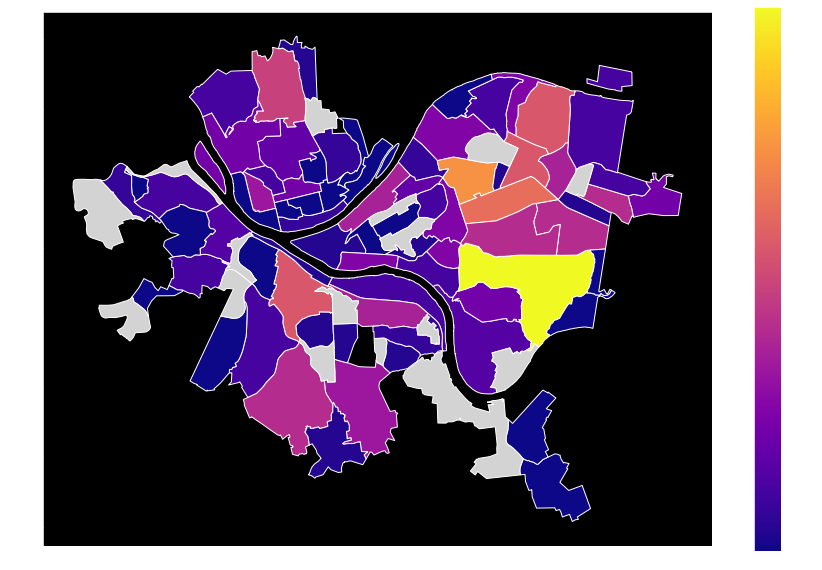

In [55]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

# do the merge
traffic_map = neighborhoods.merge(data_nieghborhood, how='left', left_on='hood', right_index= True)
# look at the head to confirm it merged correctly


# draw a choropleth map using data from the column named "number_of_steps"
traffic_map.plot(column='id', # set the data to be used for coloring
               cmap='plasma',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Average Number of Cars"},
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

## Conclusion for Traffic

Overall, the data shows that the South Side has the most traffic, making it the worst neighborhood to own a car in. This is because traffic makes it difficult to get from place to place, so more traffic would mean more waiting and less road safety. Lincoln-Lemington-Belmar had the least amount of traffic, making it the best neighborhood to own a car in out of this data set.

"Reflect on how the data driven determination of 'best neighborhood' is the same or different from your personal favorite neighborhood."

The data driven determination of "best neighborhood" is different from my personal favorite neighborhood solely based on my own bias. I like Oakland since I am used to it, but it has a lot of traffic. As someone who does not currently have a car, the traffic is not an issue for me.

# Overall Conclusion - Who came out on top? 👀
By combination of all three submetrics, Squirrel Hill (South) was measured as the safest neighborhood to own a car in. Unlike many of the other neighboroods, Squirrel Hill proved itself above average in amount of speed bumps, signalized intersections, and traffic count. Although this differs from our personal favorite neighborhood (Oakland), we aren't the most familiar with driving through Pittsburgh so analyzing this data was very interesting!

# Stats:
- 1st place by metric of Speed Bumps, totaling 18 among a neighborhood average of 4

- 4th place by metric of Signalized Intersections, totaling 30 signalized intersections among a neighborhood average of 9

- 18th place metric of Traffic Count, with a count of 3278.6857142857143, among a neighborhood average of 3,390.89394